In [23]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *
import unicodedata
import codecs
import re
import os.path
import string
#import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

# Chargement des données

In [2]:
def load_movies(path2data): # 1 classe par répertoire
    alltxts = [] # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        #print(cl)
        #print(type(cl))
        if cl == '.DS_Store':
            continue
        for f in os.listdir(path2data+cl):
            txt = open(path2data+cl+'/'+f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt+=1 # chg répertoire = cht classe

    return alltxts,labs

In [3]:
path = "../../dataset/movies1000/"

alltxts,alllabs = load_movies(path)

print(alltxts[10])
print(alllabs[10])

starring shawnee smith ; donovan leitch ; ricky paull goldin ; kevin dillon & billy beck the blob is the remake of the 1960's classic ( a term that i use very loosely to define the original ) about a really mean glob of goop that takes out anything that gets in its way . 
now the original version has the virtue of cheesy special effects which give it a kind of nostalgic campy feel . 
the fact that steve mcqueen was the star of the film doesn't exactly hurt it either . 
fast forward to the late '80's . 
steve mcqueen isn't in the remake ( this might have something to do with the fact that he had been pushing up daisies for years ) . 
nor is there any hollywood heavy hitters in the lead role . 
that is unless you count matt dillon's brother kevin as a hollywood heavy hitter . 
the other thing that works against this new blob is that special effects technology has improved dramatically since the original . 
the only things you need now to have great special effects in a movie are deep poc

# Pretraitement

In [14]:
text = keep_only_part(alltxts, None)
text = remove_caps(text)
text = remove_ponctuation(text)
text = change_capital_words(text)
text = remove_numbers(text)

print(text[0])

bad  bad  bad  that one word seems to pretty much sums up beyond the valley of the dolls  if that summary isnt enough for you  how about ta  ta  ta  still havent got the point  other than director russ meyers predilection for casting attractive large breasted women who ultimately expose the aforementioned anatomical areas  there is really only one other reason to recommend even taking a look at this movie  that is the fact that it was cowritten by famed film critic roger ebert  who also was responsible for the screenplay  after watching this movie you will never be able to sit through another one of his reviews where he gives a movie a thumbs down for bad writing with a straight face  this movie stinks out loud  quite frankly  this movie deserves a  but there are parts of it that are so bad they are almost funny  so im giving it a  and maybe that is too generous  right from the opening credits  i knew that i had a classa bomb on my hands  not only are the way the credits actually shot 

# Extraction du vocabulaire (BoW)

Avant preprocessing : 
Longueur du vocabulaire : 39659
Vocabulaire : ['00' '000' '0009f' ... 'zwigoff' 'zycie' 'zzzzzzz']

Suppression des majuscules, mots vides (stop-words) et seulement les 100 mots les plus fréquents : 

Longueur du vocabulaire : 100
Vocabulaire : ['acting' 'action' 'actors' 'actually' 'audience' 'away' 'bad' 'best'
 'better' 'big' 'cast' 'character' 'characters' 'come' 'comedy' 'comes'
 'course' 'day' 'did' 'didn' 'director' 'does' 'doesn' 'don' 'effects'
 'end' 'fact' 'family' 'far' 'film' 'films' 'fun' 'funny' 'gets' 'goes'
 'going' 'good' 'great' 'guy' 'hard' 'high' 'interesting' 'isn' 'john'
 'just' 'know' 'life' 'like' 'little' 'll' 'long' 'look' 'lot' 'love'
 'make' 'makes' 'making' 'man' 'minutes' 'movie' 'movies' 'new' 'old'
 'original' 'people' 'performance' 'place' 'played' 'plays' 'plot' 'point'
 'quite' 'real' 'really' 'right' 'role' 'say' 'scene' 'scenes' 'screen'
 'script' 'seen' 'set' 'special' 'star' 'story' 'takes' 'thing' 'things'
 'think' 'time' 

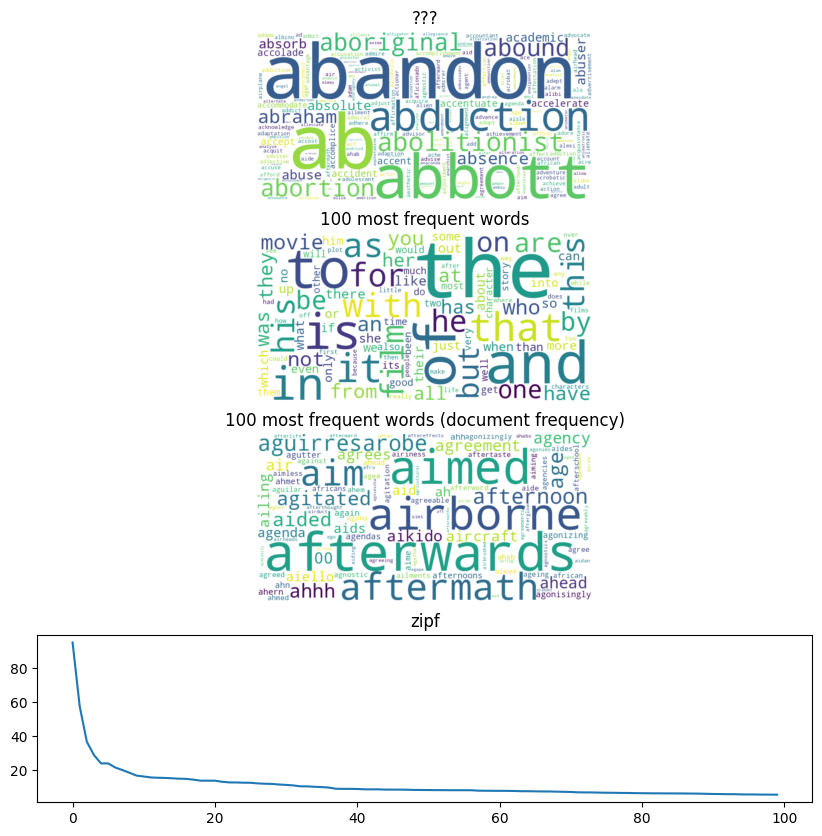

In [10]:
print("Avant preprocessing : ")
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts).toarray()
vocab = vectorizer.get_feature_names_out()
print(f"Longueur du vocabulaire : {len(vocab)}")
print(f"Vocabulaire : {vocab}")

idx = (-X.sum(axis=0)/len(vocab)).argsort()[:100]
cloud = vocab[idx]
idx1 = (-X/len(vocab)).max(axis=1).argsort()[:100]

freq = dict(zip(cloud, (X.sum(axis=0)/len(vocab))[idx]))
freq_doc = dict(zip(vocab[idx1], (X/len(vocab)).max(axis=1)[idx1]))
#print("freq = ", freq)
words = ' '.join([word for word in vocab])
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud2 = WordCloud(width=800, height=400, background_color='white', max_words=100)
wordcloud3 = WordCloud(width=800, height=400, background_color='white', max_words=100)
wc1 = wordcloud.generate(words)
wc2 = wordcloud2.generate_from_frequencies(freq)
wc3 = wordcloud3.generate_from_frequencies(freq_doc)

print()
print("Suppression des majuscules, mots vides (stop-words) et seulement les 100 mots les plus fréquents : ")
print()
vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_features=100)
X = vectorizer.fit_transform(alltxts)
vocab = vectorizer.get_feature_names_out()
print(f"Longueur du vocabulaire : {len(vocab)}")
print(f"Vocabulaire : {vocab}")

zipf = np.asarray(X.sum(axis=0) / len(vocab)).reshape(-1)
zipf = np.sort(zipf)[::-1]
print(zipf.shape)

fig, axes = plt.subplots(4, 1, figsize=(10, 10))
for ax, wc, title in zip(axes.ravel(), [wc1, wc2, wc3, zipf], ['???', '100 most frequent words', '100 most frequent words (document frequency)', 'zipf']):
    #print(np.min(im))
    #print(np.max(im))
    if title == 'zipf':
        ax.plot(wc)
        ax.set_title(title)
    else:
        ax.imshow(wc, interpolation='bilinear')
        ax.set_title(title)
        ax.axis('off')  
    
plt.show()

In [12]:
print("Bigrammes")
print()
vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(2,2), max_features=100)
X = vectorizer.fit_transform(alltxts)
vocab = vectorizer.get_feature_names_out()
print(f"Longueur du vocabulaire : {len(vocab)}")
print(f"Vocabulaire : {vocab}")

print("Trigrammes")
print()
vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(3,3), max_features=100)
X = vectorizer.fit_transform(alltxts)
vocab = vectorizer.get_feature_names_out()
print(f"Longueur du vocabulaire : {len(vocab)}")
print(f"Vocabulaire : {vocab}")

Bigrammes

Longueur du vocabulaire : 100
Vocabulaire : ['action film' 'action movie' 'action scenes' 'action sequences' 'bad guy'
 'bad guys' 'bad movie' 'batman robin' 'best friend' 'big screen'
 'blair witch' 'boogie nights' 'box office' 'bruce willis'
 'character development' 'comic book' 'comic relief' 'computer generated'
 'did summer' 'don know' 'don think' 'eddie murphy' 'end film'
 'entire film' 'falls love' 'feels like' 'film does' 'film doesn'
 'film film' 'film just' 'film like' 'film opens' 'film really'
 'film takes' 'films like' 'fun watch' 'good film' 'good job' 'good movie'
 'good time' 'great deal' 'half hour' 'haven seen' 'high school'
 'hong kong' 'horror film' 'horror films' 'jackie brown' 'jackie chan'
 'jim carrey' 'john travolta' 'just like' 'just plain' 'know did'
 'las vegas' 'little bit' 'long time' 'look like' 'looks like'
 'love story' 'main character' 'main characters' 'make film' 'make sense'
 'martial arts' 'motion picture' 'movie just' 'movie like' 'movi

In [24]:
print("Apprentissage par TF-IDF")

#test
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')#, ngram_range=(1,3)) laisser que les mots, sinon moins efficace
X = vectorizer.fit_transform(alltxts)
vocab = vectorizer.get_feature_names_out()

x_train, x_test, y_train, y_test = train_test_split(X, alllabs, test_size = 0.2, random_state=10, shuffle=True)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(x_train, y_train)


#Logistic Regression
t = 1e-8
C=100.0
lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)
lr_clf.fit(x_train, y_train)

#Linear SVM
svm_clf = LinearSVC(random_state=0)
svm_clf.fit(x_train, y_train)

pred_nbt = nb_clf.predict(x_train)
pred_lrt = lr_clf.predict(x_train)
pred_svmt = svm_clf.predict(x_train)

pred_nb = nb_clf.predict(x_test)
pred_lr = lr_clf.predict(x_test)
pred_svm = svm_clf.predict(x_test)


print(f"Naïve Bayes accuracy train={accuracy_score(y_train, pred_nbt)}, accuracy test={accuracy_score(y_test, pred_nb)}")
print(f"Logistic Regression accuracy train={accuracy_score(y_train, pred_lrt)}, accuracy test={accuracy_score(y_test, pred_lr)}")
print(f"SVM accurac ytrain={accuracy_score(y_train, pred_svmt)}, accuracy test={accuracy_score(y_test, pred_svm)}")

Apprentissage par TF-IDF
Naïve Bayes accuracy train=0.973125, accuracy test=0.805
Logistic Regression accuracy train=1.0, accuracy test=0.8375
SVM accurac ytrain=1.0, accuracy test=0.8425
